# The Elitzur-Vaidman bomb experiment

Your task is to improve the bomb-detecting strategy in this notebook to satisfy the following guarantee: given an error parameter $\varepsilon$, output an experiment that detects a bomb without triggering it with probability $1 - \varepsilon$.

In [ ]:
import os
qiskit_key = os.getenv('QISKIT_KEY')

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

backend = service.get_backend('ibmq_qasm_simulator')
backend.configuration

In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
# from qiskit import QasmSimulator

# from qiskit_ibm_provider.IBMProvider


from qiskit.visualization import *
from qiskit.visualization import circuit_drawer
# from ibm_quantum_widgets import *
# from qiskit.providers.aer import QasmSimulator
from math import pi
# from ibm_quantum_widgets import draw_circuit

# Loading your IBM Quantum account(s)

In [5]:
import qiskit
qiskit.__version__



'1.0.1'

In [2]:
import warnings


In [ ]:

import os
qiskit_key = os.getenv('QISKIT_KEY')

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

backend = service.get_backend('ibmq_qasm_simulator')
backend.configuration

In [3]:

# Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=qiskit_key, set_as_default=True, overwrite=True)

service = QiskitRuntimeService()

backend = service.get_backend('ibmq_qasm_simulator')
backend.configuration

<bound method IBMBackend.configuration of <IBMBackend('ibmq_qasm_simulator')>>

In [7]:
from qiskit_ibm_runtime.fake_provider import FakeProvider
backend = FakeProvider().get_backend("fake_ourense")
FakeProvider().backends()

[<FakeAlmaden('fake_almaden')>,
 <FakeArmonk('fake_armonk')>,
 <FakeAthens('fake_athens')>,
 <FakeBelem('fake_belem')>,
 <FakeBoeblingen('fake_boeblingen')>,
 <FakeBogota('fake_bogota')>,
 <FakeBrooklyn('fake_brooklyn')>,
 <FakeBurlington('fake_burlington')>,
 <FakeCairo('fake_cairo')>,
 <FakeCambridge('fake_cambridge')>,
 <FakeCambridgeAlternativeBasis('fake_cambridge')>,
 <FakeCasablanca('fake_casablanca')>,
 <FakeEssex('fake_essex')>,
 <FakeGuadalupe('fake_guadalupe')>,
 <FakeHanoi('fake_hanoi')>,
 <FakeJakarta('fake_jakarta')>,
 <FakeJohannesburg('fake_johannesburg')>,
 <FakeKolkata('fake_kolkata')>,
 <FakeLagos('fake_lagos')>,
 <FakeLima('fake_lima')>,
 <FakeLondon('fake_london')>,
 <FakeManila('fake_manila')>,
 <FakeManhattan('fake_manhattan')>,
 <FakeMelbourne('fake_melbourne')>,
 <FakeMontreal('fake_montreal')>,
 <FakeMumbai('fake_mumbai')>,
 <FakeNairobi('fake_nairobi')>,
 <FakeOurense('fake_ourense')>,
 <FakeParis('fake_paris')>,
 <FakePoughkeepsie('fake_poughkeepsie')>,
 <Fa

In [27]:
# from qiskit.providers.fake_provider import FakeProvider
# from qiskit.providers.fake_provider import FakeProvider
backend = FakeProvider().get_backend("fake_ourense")



In [11]:
import numpy as np
import math

# Importing core Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile


# Importing visualization tools
from qiskit.visualization import plot_histogram, circuit_drawer
# from qiskit.providers
# Importing the Aer QasmSimulator directly from qiskit.providers.aer
# from qiskit.providers.aer import QasmSimulator

# Importing IBM Quantum provider
# from qiskit_ibm_provider import IBMProvider


# IBM Quantum Widgets - This specific import may need to be updated or removed depending on the latest package updates.
# It's best to check the latest documentation for IBM Quantum Widgets or equivalent tools.

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()
# backend = Aer.get_backend('qasm_simulator')
# backend = FakeQasmBackend()


In [12]:
b = QuantumCircuit(1, 1, name='Bomb')
b.measure(0, 0)
bomb = b.to_instruction()

nb = QuantumCircuit(1, 1, name='No bomb')
nb.id(0)
no_bomb = nb.to_instruction()
no_bomb, bomb

(Instruction(name='No bomb', num_qubits=1, num_clbits=1, params=[]),
 Instruction(name='Bomb', num_qubits=1, num_clbits=1, params=[]))

In [14]:

def elitzur_vaidman(black_box, eps):
    # --------- #
    ### EDIT HERE ###
    #calculate rotation theta
    rotation_theta = 2 * np.arccos(np.sqrt(1 - eps))

    circuit = QuantumCircuit(1, 2)

    # apply ry gate
    circuit.ry(rotation_theta, 0)

    circuit.h(0)
    circuit.append(black_box, qargs=[0], cargs=[0])
    circuit.h(0)


    circuit.measure(0, 1)
    # --------- #
    # circuit.cx(0, 1)

    job = backend.run(transpile(circuit, backend), shots=1024)
    results = {'Bomb': 0, 'BOOM!': 0, 'No bomb': 0}
    for outcome, frequency in job.result().get_counts().items():
        if '1' in outcome[1:]:
            results['BOOM!'] += frequency
        # --------- #
        ### EDIT HERE ###

        elif outcome[0] == '0':

        # --------- #
            results['No bomb'] += frequency
        else:
            results['Bomb'] += frequency
    print(results)
    return circuit, results

In [16]:
def elitzur_vaidman(black_box, eps):

    N_rotations = int(np.pi / (2 * eps))  # Calculate the number of rotations
    theta =  np.pi / N_rotations

    circuit = QuantumCircuit(1, 2)

    for i in range(N_rotations):
        circuit.ry(theta, 0)
        if black_box.name == 'Bomb':
            circuit.measure(0, 0)
        circuit.append(black_box, qargs=[0], cargs=[0])

    # final measurement
    circuit.measure(0, 1)

    # Execute the circuit
    job = backend.run(transpile(circuit, backend), shots=1024)
    results = {'Bomb': 0, 'BOOM!': 0, 'No bomb': 0}
    for outcome, frequency in job.result().get_counts().items():
        print(outcome, frequency)
        if '1' in outcome[1:]:
            results['BOOM!'] += frequency
        # --------- #
        ### EDIT HERE ###
        elif outcome[0] != '0':
        # --------- #
            results['No bomb'] += frequency
        else:
            results['Bomb'] += frequency
    print(results)
    return circuit, results

/Users/darien/miniforge3/envs/QuantumEnv/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:570: RuntimeWarning: Aer not found using BasicAer and no noise
  warnings.warn("Aer not found using BasicAer and no noise", RuntimeWarning)


10 1024
{'Bomb': 0, 'BOOM!': 0, 'No bomb': 1024}
theta: 0.785, 0.785,
N: 4.0, 229.2
expected Pr: 0.500
10 1024
{'Bomb': 0, 'BOOM!': 0, 'No bomb': 1024}
theta: 0.032, 0.032,
N: 99.3, 5691.2
expected Pr: 0.999


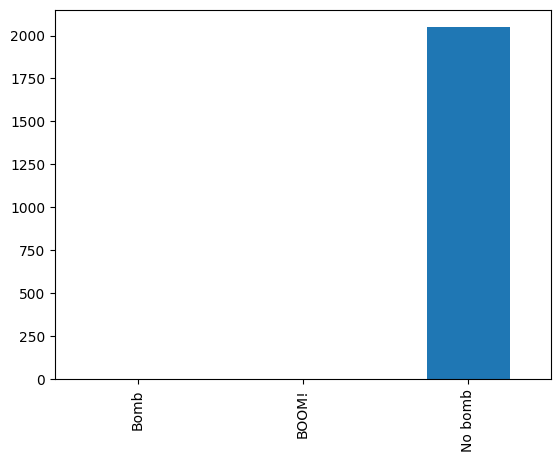

Bomb          0
BOOM!         0
No bomb    2048
dtype: int64

In [22]:
from matplotlib import pyplot as plt
import pandas as pd


results_con = []
for eps in [0.5, 0.001]:
    theta =    np.arccos(np.sqrt(1 - eps))
    N = np.pi / ( np.arccos(np.sqrt(1 - eps)))
    # theta2 = np.pi/ (2*N)
    theta2 = np.arccos(np.sqrt(1 - eps))

    out_circuit, results = elitzur_vaidman(no_bomb, eps)
    results_con.append(results)

    print(f'theta: {theta:.3f}, {theta2:.3f},\nN: {N:.1f}, {degrees(N):.1f}')
    try:
        print(f'expected Pr: {1-eps:.3f}')
        observed_pr = results['No bomb']/((results['BOOM!'] + results['Bomb']))
        print(f'observed B!: {1 - observed_pr:.3f}')
        observed_pr = results['No bomb']/((results['No bomb'] + results['Bomb']))
        print(f'observed Pr: {1 - observed_pr:.3f}\n')
    except:
        pass

results_df = pd.DataFrame(results_con).sum()
results_df.plot.bar()
plt.show()
display(results_df)

# display(out_circuit.draw())

In [24]:
for eps in [0.5, 0.1, 0.01, 0.001]:
    results = elitzur_vaidman(no_bomb, eps)

{'Bomb': 510, 'BOOM!': 0, 'No bomb': 514}
{'Bomb': 106, 'BOOM!': 0, 'No bomb': 918}
{'Bomb': 9, 'BOOM!': 0, 'No bomb': 1015}
{'Bomb': 1, 'BOOM!': 0, 'No bomb': 1023}


In [41]:
for eps in [0.5, 0.1, 0.01, 0.001]:
    elitzur_vaidman(bomb, eps)

{'Bomb': 557, 'BOOM!': 0, 'No bomb': 467}
{'Bomb': 505, 'BOOM!': 0, 'No bomb': 519}
{'Bomb': 486, 'BOOM!': 0, 'No bomb': 538}
{'Bomb': 499, 'BOOM!': 0, 'No bomb': 525}


Bomb Circuit:


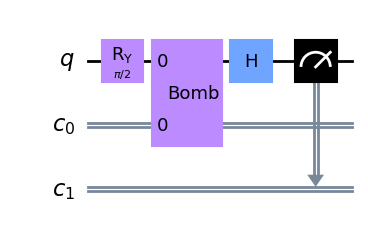


No Bomb Circuit:


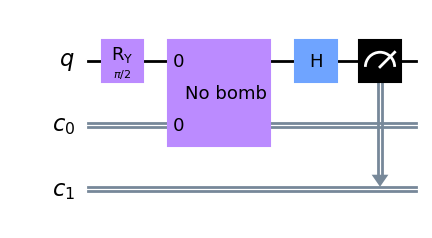

In [37]:
# Feel free to include graphs/plots/visualisations here; but only the section in the elitzur_vaidman function will be marked.

# Define a function to create and display a quantum circuit
def display_circuit(black_box):
    rotation_theta = 2 * np.arccos(np.sqrt(1 - eps))


    # apply ry gate
    circuit = QuantumCircuit(1, 2)

    circuit.ry(rotation_theta, 0)

    # circuit.h(0)
    circuit.append(black_box, qargs=[0], cargs=[0])
    circuit.h(0)
    circuit.measure(0, 1)
    return circuit

# Display the circuit for both 'Bomb' and 'No bomb' cases
bomb_circuit = display_circuit(bomb)
no_bomb_circuit = display_circuit(no_bomb)

print("Bomb Circuit:")
display(bomb_circuit.draw('mpl'))

print("\nNo Bomb Circuit:")
display(no_bomb_circuit.draw('mpl'))



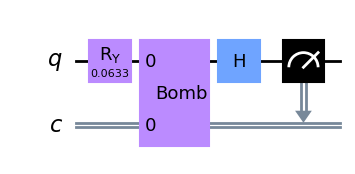

In [26]:
bb = bomb

theta = 2 * np.arccos(np.sqrt(1 - eps))
shots = 1024  # Number of experimental trials

# Initialize a Quantum Circuit with 1 qubit and 1 classical bit
circuit = QuantumCircuit(1, 1)

# Apply the ry gate for the calculated theta to prepare the qubit
circuit.ry(theta, 0)

# If the black_box involves a measurement, make sure to append it correctly
circuit.append(bb, qargs=[0], cargs=[0])

# Apply a Hadamard gate after interacting with the black_box.
circuit.h(0)

# Final measurement of the qubit state to determine the outcome.
circuit.measure(0, 0)

display(circuit.draw('mpl'))
